# Common data transformations

#### Description:

This codebook covers how to perform common data transformations.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/pokemon.csv'))

### Check the shape and head of the dataframe
-------------------------

In [4]:
df_raw.shape

(800, 13)

In [5]:
df_raw.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [6]:
df_raw.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [7]:
df = df_raw

In [8]:
df['Generation'].unique()

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [9]:
df_labels = df[['Generation']].copy()

label_encoder = preprocessing.LabelEncoder()

labels = label_encoder.fit_transform(df['Generation'])

df_labels['Generation_label'] = labels

In [10]:
df_labels.head()

,Generation,Generation_label
0,Gen 1,0
1,Gen 1,0
2,Gen 1,0
3,Gen 1,0
4,Gen 1,0


In [11]:
df_dummies = pd.get_dummies(df['Generation'])

In [12]:
df_dummies.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

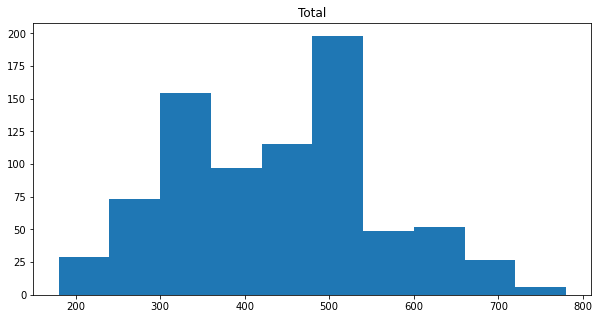

In [13]:
df.hist(column='Total', grid=False, figsize=(10,5))

In [14]:
df_bins = df[['Total']].copy()

bin_labels = ['low', 'med', 'high']

bins = pd.qcut(df['Total'], q=[0, .33, .66, 1], labels=bin_labels)

df_bins['Total_bins'] = bins

In [15]:
df_bins.head()

,Total,Total_bins
0,318,low
1,405,med
2,525,high
3,625,high
4,309,low


In [16]:
df_minmax = df[['Total']].copy()

minmax_scaler = preprocessing.MinMaxScaler()

minmax = minmax_scaler.fit_transform(df['Total'].values.reshape(-1, 1))

df_minmax['Total_minmax'] = minmax

In [17]:
df_minmax.head()

,Total,Total_minmax
0,318,0.230000
1,405,0.375000
2,525,0.575000
3,625,0.741667
4,309,0.215000


In [18]:
df_log = df[['Total']].copy()

df_log['Total_log'] = pd.DataFrame(np.log((1 + df['Total'])))

In [19]:
df_log.head()

,Total,Total_log
0,318,5.765191
1,405,6.006353
2,525,6.265301
3,625,6.439350
4,309,5.736572
